In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import accuracy_score


In [41]:
path = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv"
df = pd.read_csv(path)
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [42]:
# check for missing values
df.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [43]:
# check the type of the ddataset columns (all the columns)
df.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [44]:
columns = df.columns.tolist()
columns

['lead_source',
 'industry',
 'number_of_courses_viewed',
 'annual_income',
 'employment_status',
 'location',
 'interaction_count',
 'lead_score',
 'converted']

In [45]:
# categorical variables:
cat_var = list(df.dtypes[df.dtypes == 'object'].index)
cat_var

['lead_source', 'industry', 'employment_status', 'location']

In [46]:
# numerical variables:
num_var = list(df.dtypes[df.dtypes != 'object'].index)
num_var

['number_of_courses_viewed',
 'annual_income',
 'interaction_count',
 'lead_score',
 'converted']

In [47]:
# impute missing values with 'NA' for categorical and 0 for numercial
df[cat_var] = df[cat_var].fillna('NA')
df[num_var] = df[num_var].fillna(0)
# check if the imputation is correctly done
df.isnull().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

## Question 1

In [48]:
# the most frequent value in industry column
most_freq = df['industry'].mode()[0]
print(f"The most frequent value in industry is : {most_freq}")

The most frequent value in industry is : retail


## Question 2

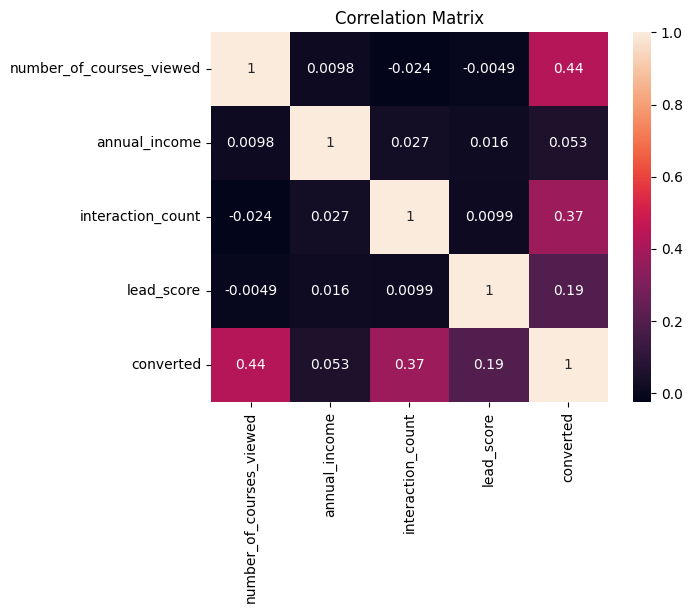

In [49]:
corr_matrix = df[num_var].corr()
sns.heatmap(corr_matrix,annot= True)
plt.title("Correlation Matrix")
plt.show()

In [50]:
# split the data in train/val/test sets with 60%/20%/20% distribution (using sklearn)
# Make sure that the target value y is not in your dataframe.
X = df.drop('converted', axis=1)
y = df['converted']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print(f"Train set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")
# check if the len is 60,20,20
print(f"Train set: {len(X_train)/len(X):.2%}, Validation set: {len(X_val)/len(X):.2%}, Test set: {len(X_test)/len(X):.2%}")

Train set: (877, 8), Validation set: (292, 8), Test set: (293, 8)
Train set: 59.99%, Validation set: 19.97%, Test set: 20.04%


In [51]:
def mutual_score_func(series):
    return mutual_info_score(series,y_train)

In [52]:
mi = X_train[cat_var].apply(mutual_score_func)
mi.sort_values(ascending=False)

lead_source          0.028192
employment_status    0.018339
industry             0.015059
location             0.003457
dtype: float64

In [53]:
mi = X_train[num_var[:-1]].apply(mutual_score_func)
mi.sort_values(ascending=False)

/opt/conda/envs/ml-zoomcamp/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:49: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_label = type_of_target(labels_true)
/opt/conda/envs/ml-zoomcamp/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


annual_income               0.582064
number_of_courses_viewed    0.122595
lead_score                  0.088911
interaction_count           0.079365
dtype: float64

In [54]:
X_train[num_var[:-1]].corrwith(y_train)

number_of_courses_viewed    0.445558
annual_income               0.000803
interaction_count           0.366016
lead_score                  0.216355
dtype: float64

## Question 4

In [55]:
numerical = ['number_of_courses_viewed',
 'annual_income',
 'interaction_count',
 'lead_score']
X_train

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score
442,referral,finance,1,61705.0,unemployed,south_america,4,0.65
319,referral,education,1,55199.0,employed,south_america,4,0.09
767,referral,retail,1,40841.0,self_employed,africa,4,0.61
756,referral,other,1,28242.0,employed,middle_east,3,0.84
424,events,retail,0,64775.0,self_employed,south_america,3,0.70
...,...,...,...,...,...,...,...,...
1130,events,manufacturing,1,57039.0,employed,south_america,2,0.30
1294,events,healthcare,2,56185.0,student,south_america,2,0.44
860,paid_ads,manufacturing,1,56402.0,student,north_america,1,0.02
1459,paid_ads,technology,1,45688.0,student,north_america,3,0.02


In [56]:
dv = DictVectorizer(sparse=False)

train_dict = X_train.to_dict(orient='records')
X_train_transformed = dv.fit_transform(train_dict)

val_dict = X_val.to_dict(orient='records')
X_val_transformed = dv.transform(val_dict)

In [57]:
# train the model
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train_transformed, y_train)
y_pred = model.predict_proba(X_val_transformed)[:, 1]
y_pred_binary = (y_pred >= 0.5).astype(int)
accuracy_base = (y_val == y_pred_binary).mean()
print(accuracy_base)

0.7431506849315068


In [58]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))


{'annual_income': np.float64(-0.0),
 'employment_status=NA': np.float64(-0.014),
 'employment_status=employed': np.float64(0.03),
 'employment_status=self_employed': np.float64(0.018),
 'employment_status=student': np.float64(0.012),
 'employment_status=unemployed': np.float64(-0.106),
 'industry=NA': np.float64(-0.021),
 'industry=education': np.float64(0.054),
 'industry=finance': np.float64(-0.025),
 'industry=healthcare': np.float64(-0.022),
 'industry=manufacturing': np.float64(-0.011),
 'industry=other': np.float64(-0.004),
 'industry=retail': np.float64(-0.016),
 'industry=technology': np.float64(-0.014),
 'interaction_count': np.float64(0.299),
 'lead_score': np.float64(0.047),
 'lead_source=NA': np.float64(0.009),
 'lead_source=events': np.float64(-0.014),
 'lead_source=organic_search': np.float64(-0.014),
 'lead_source=paid_ads': np.float64(-0.096),
 'lead_source=referral': np.float64(0.071),
 'lead_source=social_media': np.float64(-0.015),
 'location=NA': np.float64(0.005),


In [59]:
excluded_columns = ['industry','employment_status','lead_score']

for col in excluded_columns:
    # drop the feature from both the train and validation dataset
    X_train_dropped = X_train.drop(columns=[col])
    X_val_dropped = X_val.drop(columns=[col])
    
    #instantiate the Dictvictorizer to encode categorical variables
    dv = DictVectorizer(sparse=False)
    train_dict = X_train_dropped.to_dict(orient='records')
    X_train_transformed = dv.fit_transform(train_dict)
    val_dict = X_val_dropped.to_dict(orient='records')
    X_val_transformed = dv.transform(val_dict)

    # train the model
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train_transformed,y_train)

    # Evalueate the  model 
    y_pred = model.predict(X_val_transformed)
    acc = accuracy_score(y_val, y_pred)
    difference = accuracy_base - acc

    # Result
    print(f"After excluding {col} feature the difference in accuracy is : {difference}")
    

After excluding industry feature the difference in accuracy is : 0.0
After excluding employment_status feature the difference in accuracy is : -0.003424657534246589
After excluding lead_score feature the difference in accuracy is : 0.0


In [144]:
# train the model with all the features but with different C values
C_values = [0.01, 0.1, 1, 10]
c_dict = {}
for C in C_values:
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000, random_state=42)
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict_proba(X_val_transformed)[:, 1]
    y_pred_binary = (y_pred >= 0.5).astype(int)
    accuracy_base = (y_val == y_pred_binary).mean()
    c_dict[C] = accuracy_base
    print(f"with c equals : {C} the accuracy is {accuracy_base}")

with c equals : 0.01 the accuracy is 0.7397260273972602
with c equals : 0.1 the accuracy is 0.7397260273972602
with c equals : 1 the accuracy is 0.7431506849315068
with c equals : 10 the accuracy is 0.7431506849315068


In [147]:
my_list = []
for k, v in c_dict.items():
    my_list.append(v)
print(my_list)

[np.float64(0.7397260273972602), np.float64(0.7397260273972602), np.float64(0.7431506849315068), np.float64(0.7431506849315068)]


In [151]:
array = np.array(my_list)
search = array.max()

In [152]:
for k,v in c_dict.items():
    if v == search:
        print(k)
        break

1
